<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Intro%20to%20Seaborn/introduction_to_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# Create a data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Download files using raw GitHub URLs and save them to the data folder
!wget -P data/ https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/young-people-survey-responses.csv
!wget -P data/ https://github.com/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Intro%20to%20Seaborn/data/countries-of-the-world.csv
!wget -P data/ https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/mpg.csv
!wget -P data/ https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/student-alcohol-consumption.csv

### Seaborn built-in dataset `tips`

- total_bill: The total bill amount in dollars.
- tip: The tip amount in dollars.
- sex: The gender of the person who paid the bill (Male or Female).
- smoker: Whether the party included smokers (Yes or No).
- day: The day of the week (Sun, Sat, Thur, Fri).
- time: The time of the day (Dinner or Lunch).
- size: The number of people in the party.

In [12]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


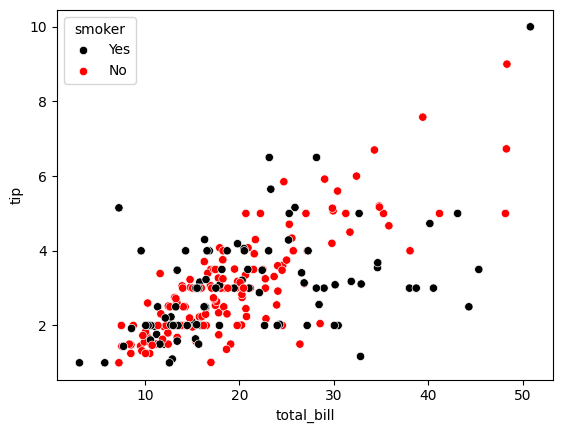

In [13]:
# Define a dictionary to map hue values ("smoker") to specific colors
hue_colors = {"Yes": "black",
"No": "red"}

# Create a scatter plot using seaborn
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,       # Use the 'tips' DataFrame as the data source
                hue="smoker",    # Color the points based on the 'smoker' column
                palette=hue_colors) # Use the defined 'hue_colors' dictionary for coloring

plt.show ()

### Using HTML hex color codes with hue


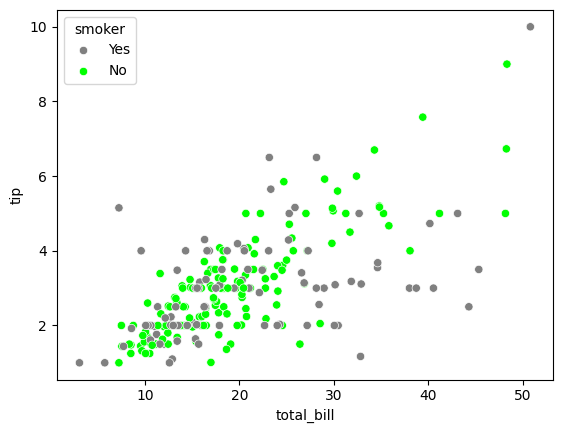

In [16]:
# Define a dictionary to map hue values ("smoker") to specific HTML hex color codes
hue_colors = {"Yes": "#808080", # Grey color for "Yes"
"No": "#00FF00"} # Green color for "No"

# Create a scatter plot using seaborn
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,
                hue="smoker",    # Color the points based on the 'smoker' column
                palette=hue_colors) # Use the defined 'hue_colors' dictionary for coloring

plt.show()